In [9]:
# Imports
import nltk
nltk.download('punkt')
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize as nltk_tokenizer
from nltk.corpus import stopwords
stopwords = list(stopwords.words('english'))
nltk.download('averaged_perceptron_tagger')

import pandas as pd
import seaborn as sns
import re

import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kushagraseth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kushagraseth/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [47]:
# Get Book Name
files = gutenberg.fileids()
file = files[0]
print('File Name: ', file)

# Get raw text from Book
raw_text = gutenberg.raw(file)

# Tokenized Text using NLTK
tokens = nltk_tokenizer(raw_text)
tokens.append([i for i in tokens])

print(tokens[0:50])
print(len(tokens))

# Remove Stopwords
def remove_stopwords(tokens):
    corpus = []
    for item in tokens:
        if item not in stopwords:
            corpus.append(item)      
    return corpus
        
tokens = remove_stopwords(tokens)
print(tokens[0:50])
print(len(tokens))

# Remove non-alphabetic characters
def remove_nonalpha(tokens):
    corpus = []
    for token in tokens:
        if str(token).isalpha():
            corpus.append(token)
    return corpus 

tokens = remove_nonalpha(tokens)
print(tokens[0:50])
print(len(tokens))

File Name:  austen-emma.txt
['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with']
191777
['[', 'Emma', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'rich', ',', 'comfortable', 'home', 'happy', 'disposition', ',', 'seemed', 'unite', 'best', 'blessings', 'existence', ';', 'lived', 'nearly', 'twenty-one', 'years', 'world', 'little', 'distress', 'vex', '.', 'She', 'youngest', 'two', 'daughters', 'affectionate', ',', 'indulgent', 'father', ';', ',', 'consequence']
112627
['Emma', 'Jane', 'Austen', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever'

In [3]:
# Freq Dist of Tokens in Raw text
dist = nltk.FreqDist(cleaned_text)
tokens_and_counts = dist.most_common(50)
print(tokens_and_counts)

[('I', 3192), ('Mr', 1154), ('Emma', 865), ('could', 825), ('would', 816), ('Mrs', 701), ('Miss', 595), ('She', 570), ('must', 568), ('Harriet', 506), ('said', 484), ('much', 478), ('He', 443), ('Weston', 439), ('one', 419), ('It', 400), ('thing', 399), ('every', 398), ('Knightley', 389), ('Elton', 387), ('think', 381), ('The', 358), ('little', 356), ('never', 347), ('good', 340), ('know', 337), ('might', 322), ('well', 317), ('Woodhouse', 314), ('say', 310), ('You', 307), ('Jane', 301), ('But', 293), ('time', 273), ('quite', 269), ('great', 264), ('Fairfax', 241), ('nothing', 237), ('always', 235), ('man', 234), ('thought', 226), ('And', 224), ('Churchill', 223), ('soon', 221), ('see', 220), ('dear', 217), ('shall', 214), ('may', 213), ('first', 211), ('without', 211)]


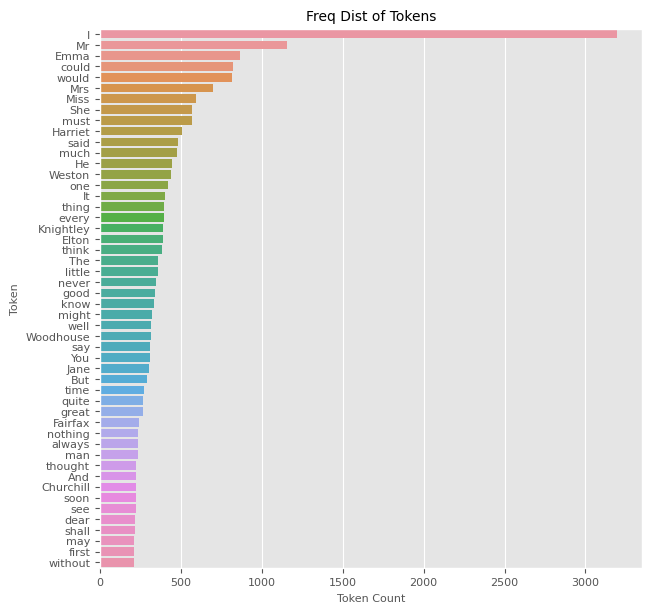

In [4]:
# Plot Freq Dist of Tokens
token_list = [tup[0] for tup in tokens_and_counts]
count_list = [tup[1] for tup in tokens_and_counts]

def plot_dist(token_list, count_list, xlabel, ylabel, title, filepath):
    dist_df = pd.DataFrame({'count_list': count_list, 'token_list': token_list})
    plt.style.use('ggplot')
    plt.figure(figsize = (7, 7))
    sns.barplot(x = 'count_list', y = 'token_list' , data = dist_df, orient = 'h')
    plt.xlabel(xlabel, size = 8)
    plt.ylabel(ylabel, size = 8)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
    plt.title(title, size = 10)
    plt.savefig(filepath)
    
plot_dist(token_list, count_list, 'Token Count', 'Token', 'Freq Dist of Tokens', 'Images/token_dist_part6.png')

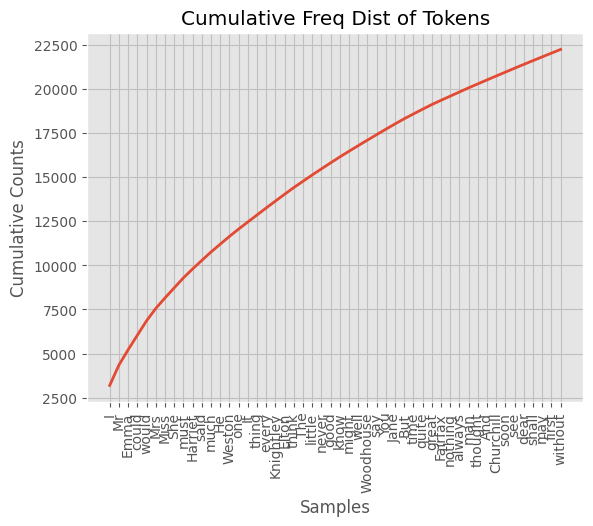

<AxesSubplot: title={'center': 'Cumulative Freq Dist of Tokens'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [5]:
# Plot Cumulative Freq Dist of Tokens
dist.plot(50, 
          title = 'Cumulative Freq Dist of Tokens', 
          cumulative = True)

In [6]:
# POS Tagging
pos_tags = nltk.pos_tag(cleaned_text)
pos_dist = nltk.FreqDist(pos_tags)
pos_and_counts = pos_dist.most_common(50)
print(pos_and_counts)

[(('I', 'PRP'), 3192), (('Mr', 'NNP'), 1150), (('Emma', 'NNP'), 845), (('could', 'MD'), 825), (('would', 'MD'), 816), (('Mrs', 'NNP'), 699), (('Miss', 'NNP'), 572), (('She', 'PRP'), 570), (('must', 'MD'), 568), (('said', 'VBD'), 484), (('Harriet', 'NNP'), 477), (('He', 'PRP'), 443), (('Weston', 'NNP'), 438), (('one', 'CD'), 413), (('It', 'PRP'), 400), (('thing', 'NN'), 399), (('every', 'DT'), 398), (('Knightley', 'NNP'), 389), (('Elton', 'NNP'), 387), (('The', 'DT'), 358), (('never', 'RB'), 347), (('good', 'JJ'), 326), (('might', 'MD'), 322), (('little', 'JJ'), 317), (('Woodhouse', 'NNP'), 313), (('well', 'RB'), 307), (('You', 'PRP'), 307), (('Jane', 'NNP'), 297), (('much', 'JJ'), 293), (('But', 'CC'), 293), (('time', 'NN'), 273), (('great', 'JJ'), 264), (('think', 'VBP'), 255), (('quite', 'RB'), 241), (('Fairfax', 'NNP'), 241), (('nothing', 'NN'), 237), (('always', 'RB'), 235), (('know', 'VBP'), 235), (('man', 'NN'), 234), (('And', 'CC'), 224), (('Churchill', 'NNP'), 223), (('soon', '

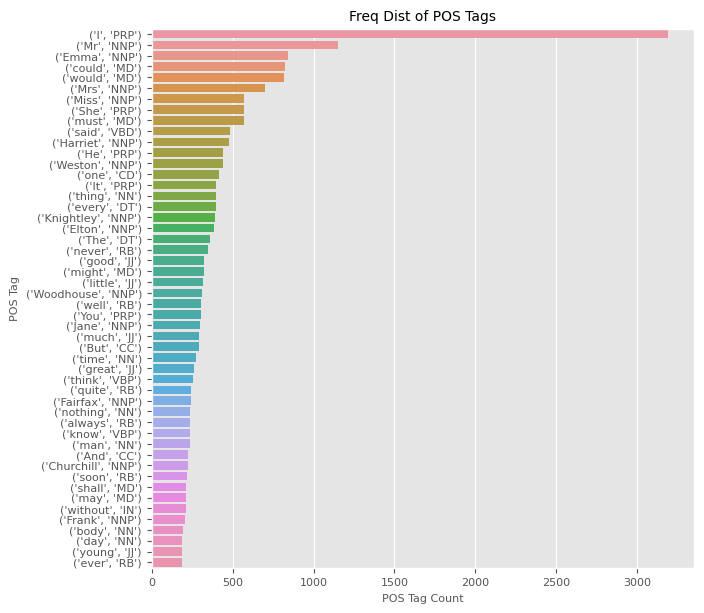

In [7]:
# Plot Freq Dist of POS Tags
pos_list = [tup[0] for tup in pos_and_counts]
pos_count_list = [tup[1] for tup in pos_and_counts]

plot_dist(pos_list, pos_count_list, 'POS Tag Count', 'POS Tag', 'Freq Dist of POS Tags', 'Images/pos_dist_part6.png')

In [8]:
# Tokenized Already
tokens_nltk = gutenberg.words(file)
print(tokens_nltk[0:50])
print(len(tokens_nltk))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the']
192427
